# Create a tmask that removes al the Arctic basin that will be used by the cdfcofdis to avoid any SSS damping

In [1]:
# Select the PANGEO kernel to be able to use this Notebook
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap
import hvplot.xarray 

%matplotlib inline

/appli/conda-env/3.6/pangeo/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/appli/conda-env/3.6/pangeo/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


>> ## Data read 

In [2]:
# Read de Domain config file
INDIR='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG12.L75/GRID/'
ds_dfg=xr.open_dataset(INDIR+'CREG12.L75-REF09_domain_cfg_20230810_Z.nc')

In [3]:
ds_dfg

<xarray.Dataset>
Dimensions:       (nlines: 114, t: 1, x: 1580, y: 1801, z: 75)
Dimensions without coordinates: nlines, t, x, y, z
Data variables:
    bathy_meter   (t, y, x) float32 ...
    bottom_level  (t, y, x) int32 ...
    e1f           (t, y, x) float64 ...
    e1t           (t, y, x) float64 ...
    e1u           (t, y, x) float64 ...
    e1v           (t, y, x) float64 ...
    e2f           (t, y, x) float64 ...
    e2t           (t, y, x) float64 ...
    e2u           (t, y, x) float64 ...
    e2v           (t, y, x) float64 ...
    e3f_0         (t, z, y, x) float64 ...
    e3t_0         (t, z, y, x) float64 ...
    e3t_1d        (t, z) float64 ...
    e3u_0         (t, z, y, x) float64 ...
    e3uw_0        (t, z, y, x) float64 ...
    e3v_0         (t, z, y, x) float64 ...
    e3vw_0        (t, z, y, x) float64 ...
    e3w_0         (t, z, y, x) float64 ...
    e3w_1d        (t, z) float64 ...
    ff_f          (t, y, x) float64 ...
    ff_t          (t, y, x) float64 ...


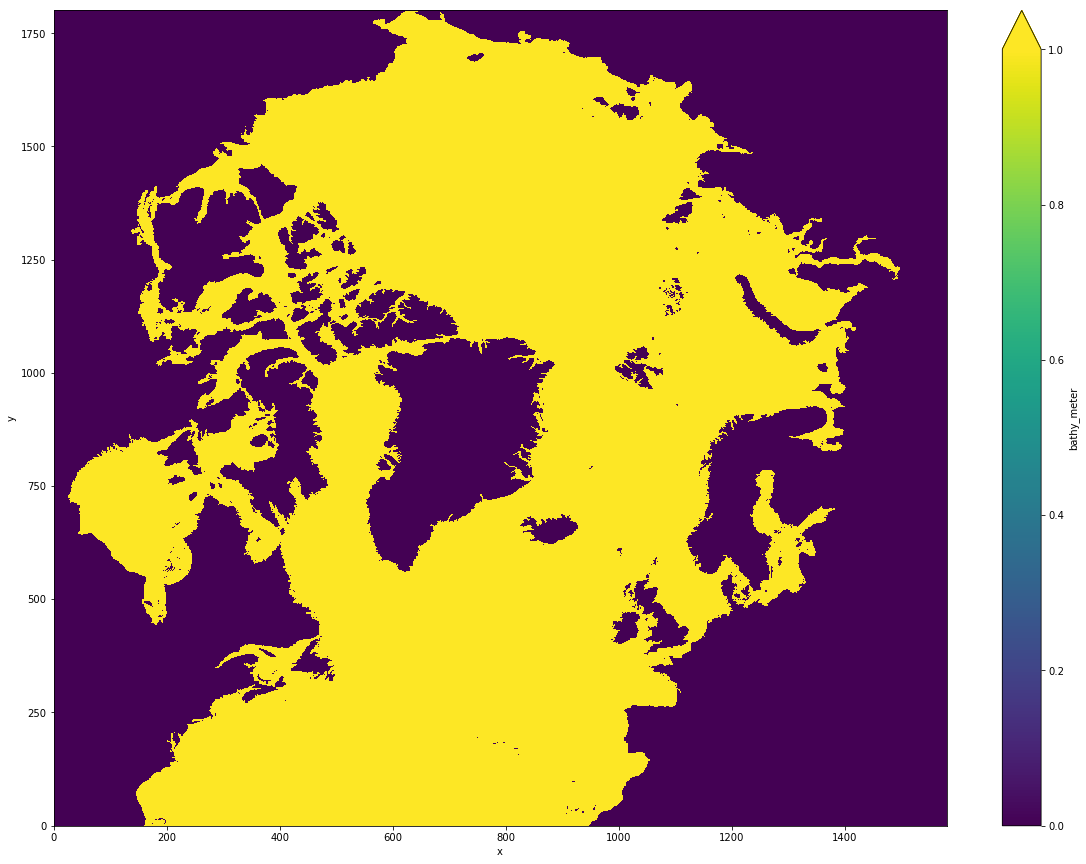

In [4]:
plt.figure(figsize=(20,15))

ds_dfg['bathy_meter'].plot(vmin=0.,vmax=1.)

In [5]:
ds_dfg['bathy_meter'][0,1060::,:]=0.

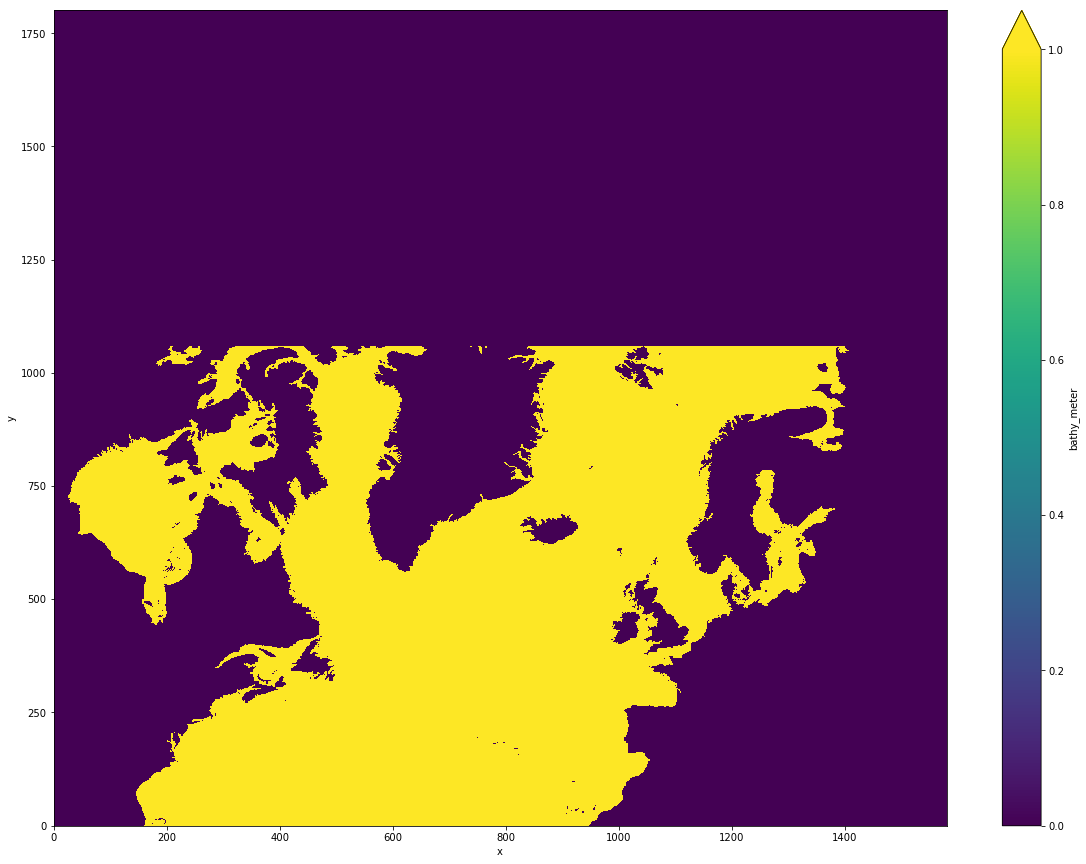

In [6]:
plt.figure(figsize=(20,15))

ds_dfg['bathy_meter'].plot(vmin=0.,vmax=1.)

In [7]:
ds_dfg['bathy_meter'][0,980:1080,1020::]=0.

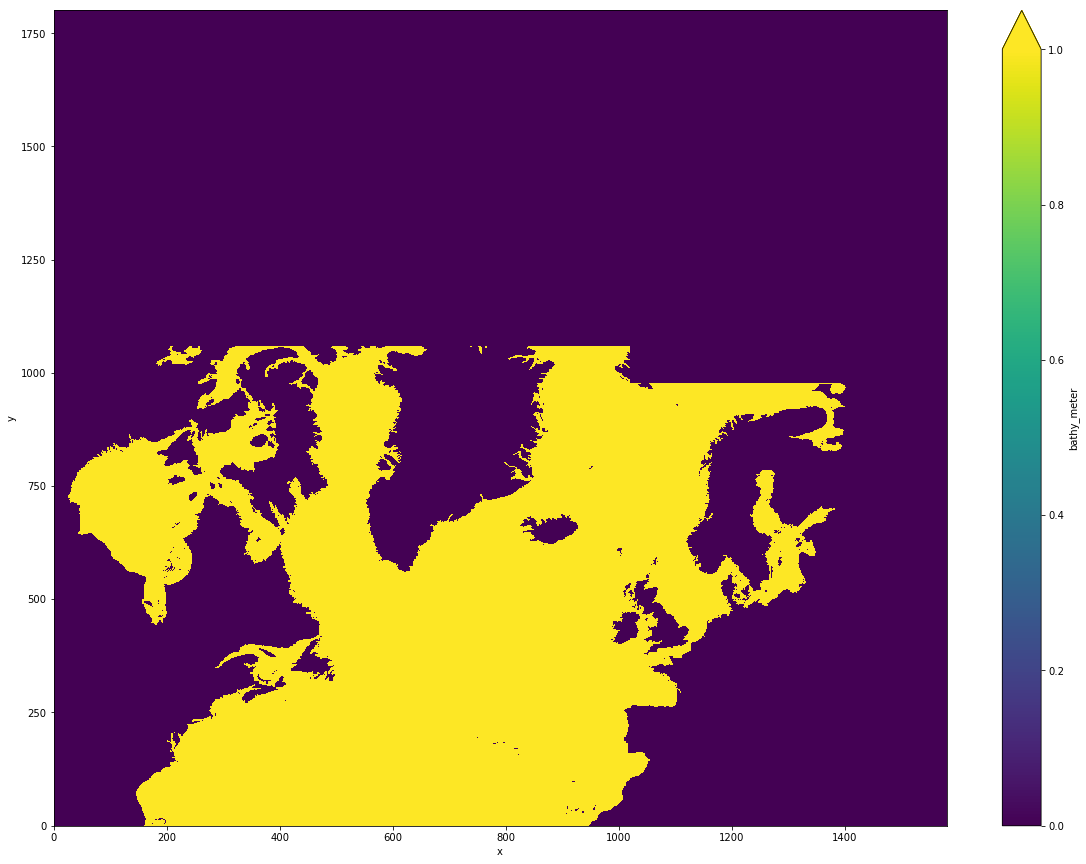

In [8]:
plt.figure(figsize=(20,15))

ds_dfg['bathy_meter'].plot(vmin=0.,vmax=1.)

In [9]:
ds_dfg['bathy_meter'][0,930:980,1070::]=0.

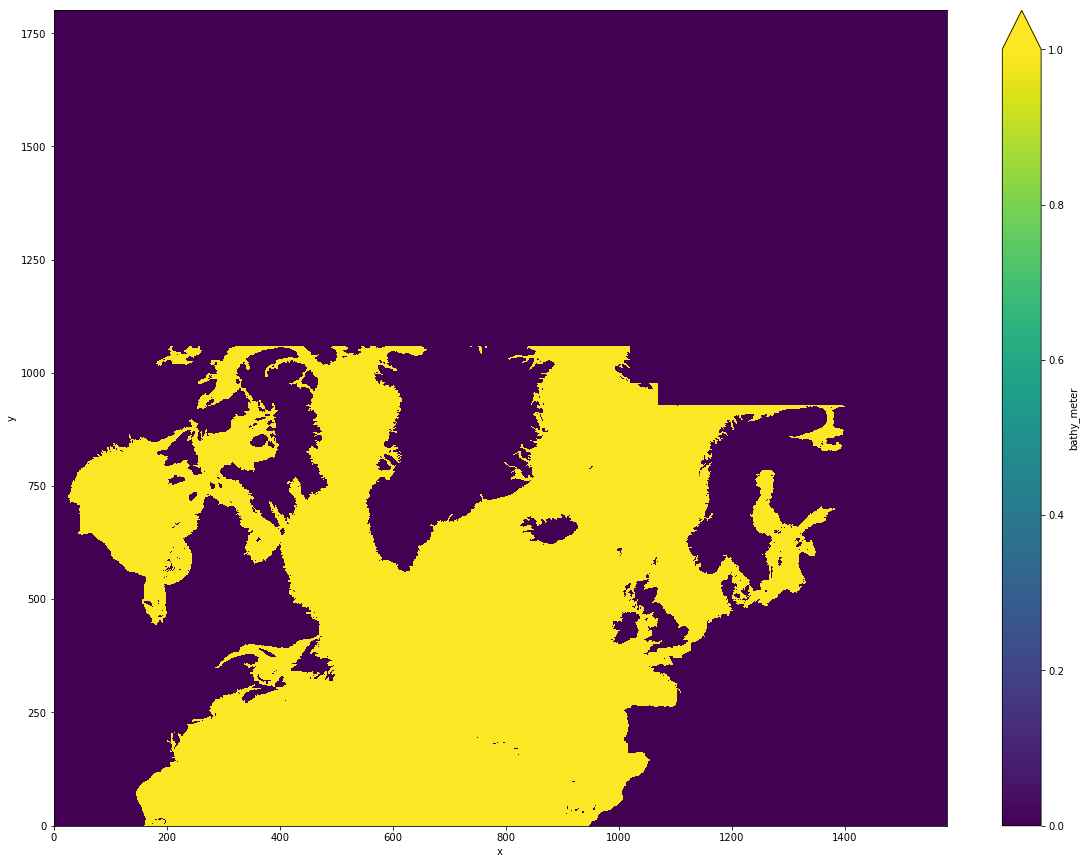

In [10]:
plt.figure(figsize=(20,15))

ds_dfg['bathy_meter'].plot(vmin=0.,vmax=1.)

In [11]:
ds_dfg['bathy_meter'][0,880:930,1130::]=0.
ds_dfg['bathy_meter'][0,830:880,1230::]=0.
ds_dfg['bathy_meter'][0,780:830,1330::]=0.
ds_dfg['bathy_meter'][0,730:780,1430::]=0.

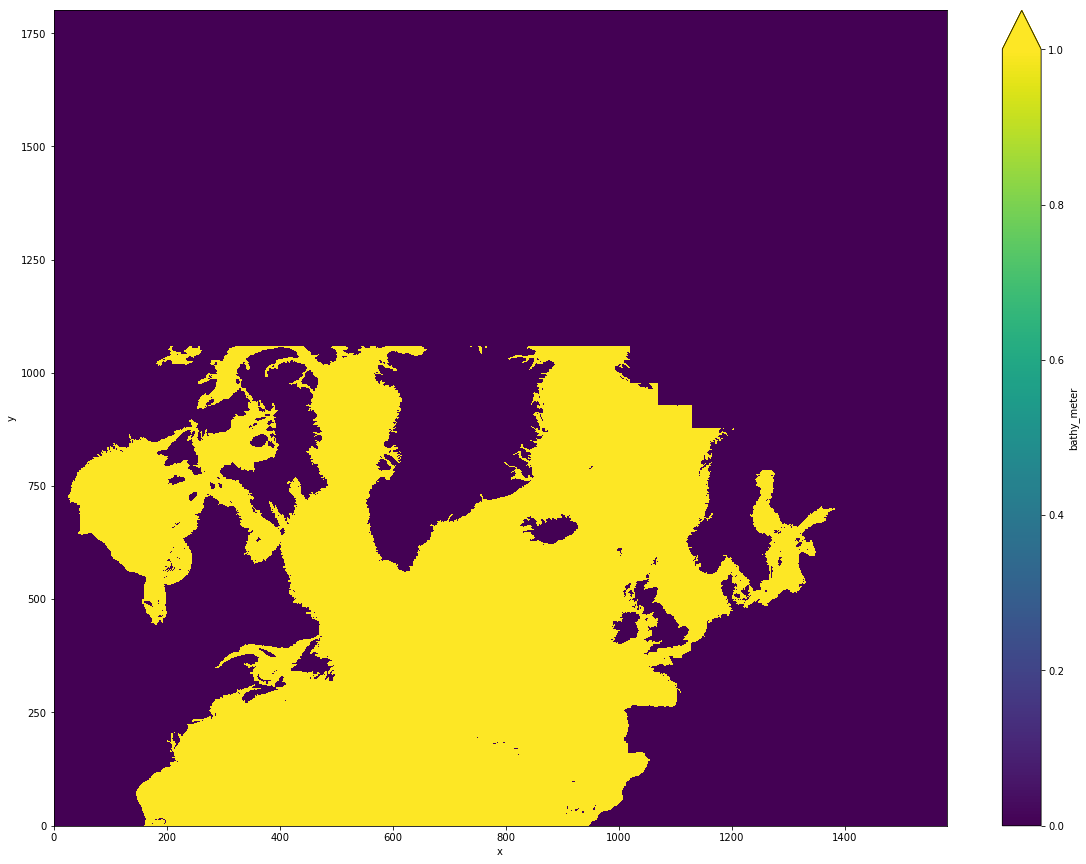

In [12]:
plt.figure(figsize=(20,15))

ds_dfg['bathy_meter'].plot(vmin=0.,vmax=1.)

In [13]:
ds_dfg['tmask']=xr.where(ds_dfg['bathy_meter'][0,:,:] > 0., 1., 0.)

In [14]:
tmask=xr.where(ds_dfg['bathy_meter'][0,:,:] > 0., 1., 0.)

In [15]:
ds_dfg

<xarray.Dataset>
Dimensions:       (nlines: 114, t: 1, x: 1580, y: 1801, z: 75)
Dimensions without coordinates: nlines, t, x, y, z
Data variables:
    bathy_meter   (t, y, x) float32 ...
    bottom_level  (t, y, x) int32 ...
    e1f           (t, y, x) float64 ...
    e1t           (t, y, x) float64 ...
    e1u           (t, y, x) float64 ...
    e1v           (t, y, x) float64 ...
    e2f           (t, y, x) float64 ...
    e2t           (t, y, x) float64 ...
    e2u           (t, y, x) float64 ...
    e2v           (t, y, x) float64 ...
    e3f_0         (t, z, y, x) float64 ...
    e3t_0         (t, z, y, x) float64 ...
    e3t_1d        (t, z) float64 ...
    e3u_0         (t, z, y, x) float64 ...
    e3uw_0        (t, z, y, x) float64 ...
    e3v_0         (t, z, y, x) float64 ...
    e3vw_0        (t, z, y, x) float64 ...
    e3w_0         (t, z, y, x) float64 ...
    e3w_1d        (t, z) float64 ...
    ff_f          (t, y, x) float64 ...
    ff_t          (t, y, x) float64 ...


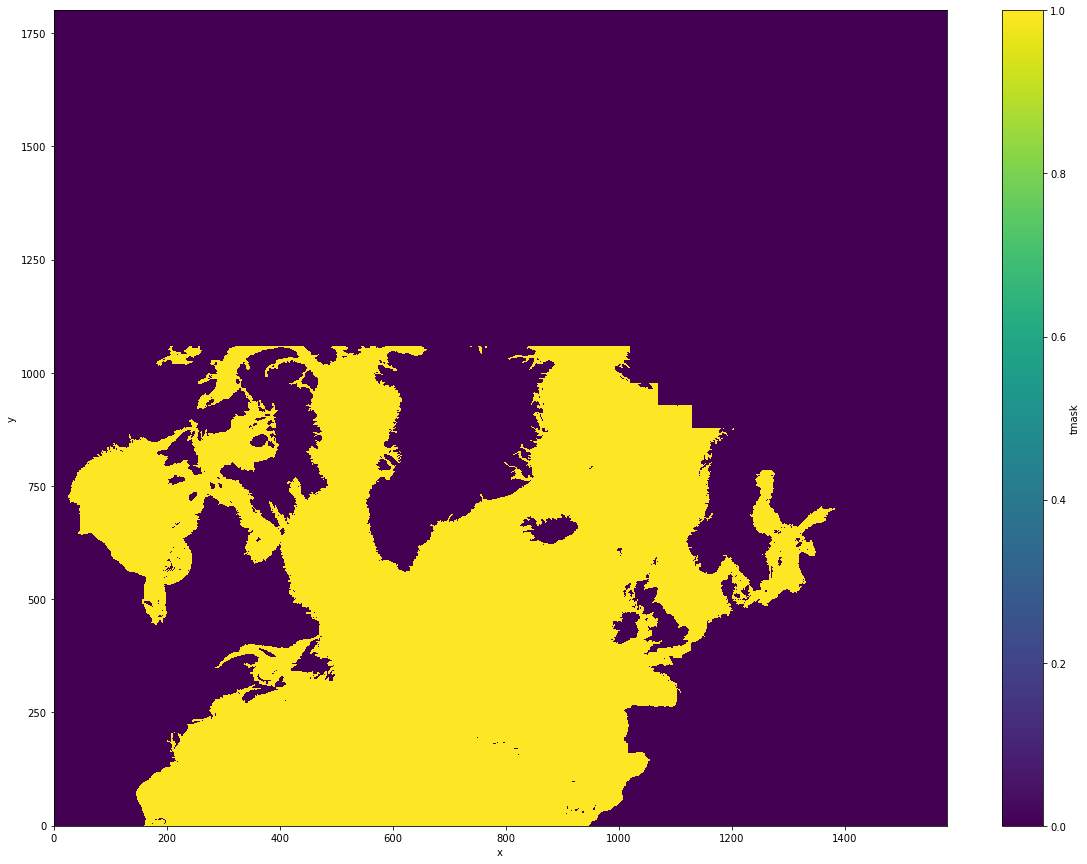

In [16]:
plt.figure(figsize=(20,15))

ds_dfg['tmask'].plot()

In [17]:
ds_out=xr.Dataset()  
ds_out['tmask']= (('y','x'),ds_dfg['tmask'].copy())
ds_out.coords['nav_lon']= (('y','x'),ds_dfg['nav_lon'].values)
ds_out.coords['nav_lat']= (('y','x'),ds_dfg['nav_lat'].values)

ds_out.attrs={'History':'This version relies on bathymetry file: CREG12.L75-REF09_domain_cfg_20230810_Z.nc',\
             'Adds':'To use ONLY for computing distance to the coast a avoid SSS damping in Arctic'}

ldate='20240426'
if True: ds_out.to_netcdf(INDIR+'CREG12.L75_tmask4distcoast_REF11_'+ldate+'.nc')